In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/00275/
df= pd.read_csv('bike_share_hour.csv')
print(df.columns)
print(df['dteday'].value_counts())
print(df.head())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
2012-01-19    24
2011-05-06    24
2012-11-19    24
2011-11-25    24
2011-07-12    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24

In [3]:
trip_counts = {'AM': 0, 'PM': 0}

#df['dteday']=pd.to_datetime(df['dteday'])

trip_datetimes=df.sort_values(by='dteday')[['dteday','hr']]

#print(trip_datetimes)

# Loop over all trips
for index,trip in trip_datetimes.iterrows():
    #print(trip['hr'])
    # Check to see if the trip starts before noon
    if trip['hr'] < 12:
        trip_counts['AM'] += 1
    else:
        trip_counts['PM'] += 1
  

print(trip_counts)

{'AM': 8636, 'PM': 8743}


        date  am count  pm count
0 2011-01-01      12.0      12.0
1 2011-01-02      11.0      12.0
2 2011-01-03      10.0      12.0
3 2011-01-04      11.0      12.0
4 2011-01-05      11.0      12.0


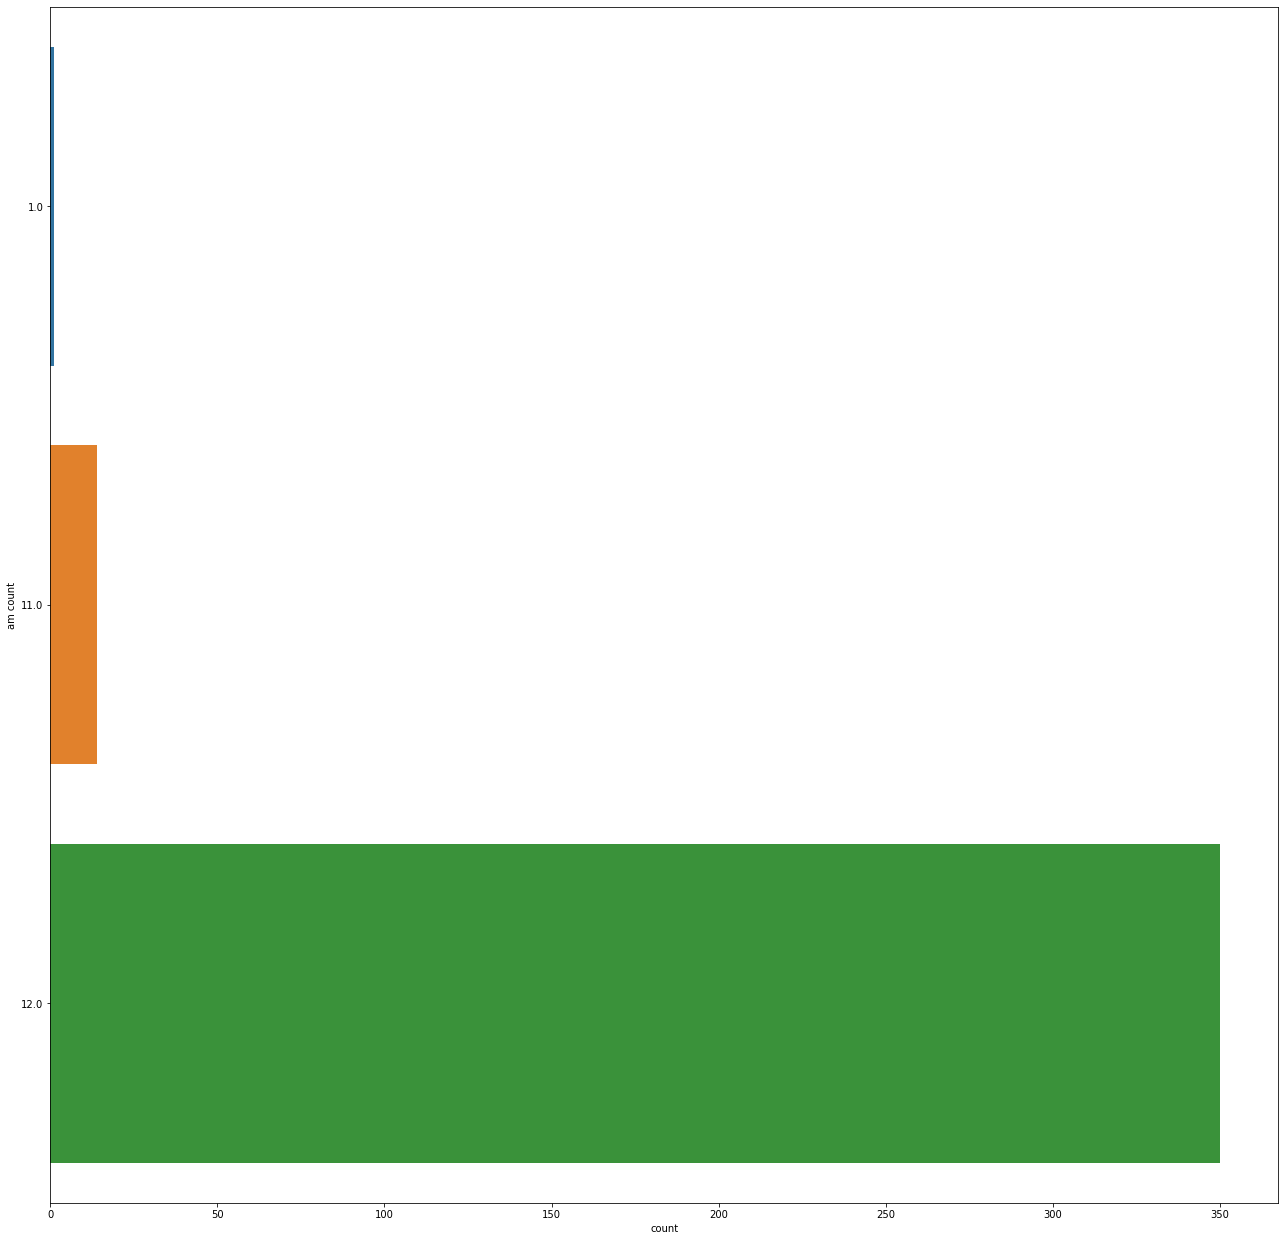

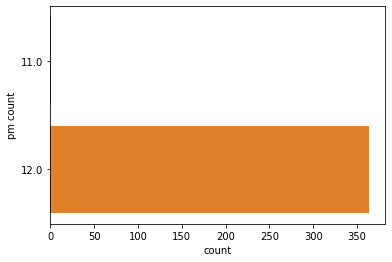

In [10]:
am_occurrences_df = (pd.to_datetime(df[df['hr']<12]['dteday'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='am count'))

pm_occurrences_df = (pd.to_datetime(df[df['hr']>=12]['dteday'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='pm count'))

results_df=pd.DataFrame(df['dteday'].unique(),columns=['date'])
results_df.reset_index()
results_df['date']=pd.to_datetime(results_df['date'])

#for index,item in results_df.iterrows():
#    print(item['date'])

results_df=pd.merge(results_df,am_occurrences_df, on='date',how='left')
results_df=pd.merge(results_df,pm_occurrences_df, on='date',how='left')
print (results_df.head())

#y_list=[results_df['am count'],results_df['pm count']]
#results_df.plot.bar(x=results_df['date'],y=results_df['pm count'])

#fig, (ax1,ax2) = plt.subplots(1, 2)

#print(max(results_df['date']))
filter= (results_df['date']>='2012-01-01') & (results_df['date']<='2012-12-31')

plt.figure(figsize=(22,22))
#sns.barplot(data=results_df[filter],x='date',y='am count' )
sns.countplot(data=results_df[filter],y='am count')
plt.show()
sns.countplot(data=results_df[filter],y='pm count')
#ax1.plot(results_df[filter]['date'],results_df[filter]['am count'])
#ax2.plot(results_df[filter]['date'],results_df[filter]['pm count'])
plt.show()